#**Metrics for NLP Models Performance:**

All the metrics to measure performance in NLP models calculate the similarity (semantics in most cases) between the generated text and the original text.

#**BLEU (Bilungual Evaluation Understudy):**

This metric was initially used for machine translation models.

Calculates the similarity between the model-generated text and the original text, using n-gram matching, BLEU-1 is based on single word matching, while BLEU-2, BLEU-3 and BLEU-4 consider the matching bigrams, trigrams and quadrigrams respectively. BLEU compares n-grams of the generation with n-grams of the reference.

**n-gram:** Subsequence of n-elements of a sequence.

**n-gram Precision:** is calculated as the number of matching n-grams in the hypothesis and the reference, divided by the number of words in the hypothesis.

$$P=\frac{\text{Common n-grams}}{\text{n-grams hypothesis}} \in [0,1]$$

**Ex:**

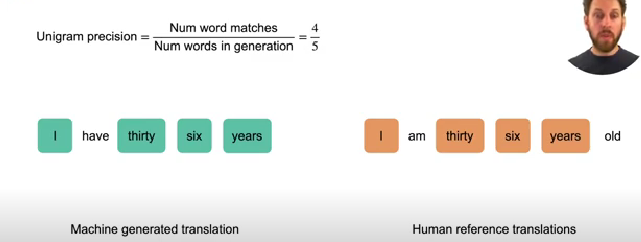


**Ex:**

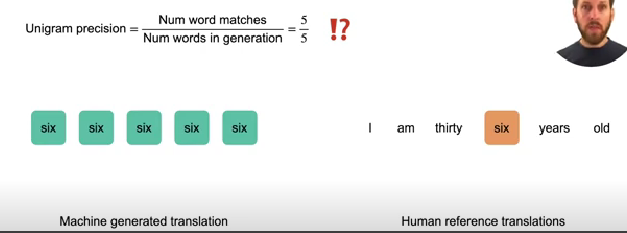

As we can see, for calculate the n-gram precision, BLEU limits the number of n-grams in common to the number of n-grams in the reference for each n-gram. Well otherwise, in this case we would be a perfect n-gram precision, when the output of the model is terrible. In this case the n-gram precision is:

$$\text{modified n-gram precision}=\frac{1}{5}=0.2$$

**The modified n-gram precision is BLEU-n (in the last example BLEU-1)**

**Ex:** In this example we calculate BLEU-1:


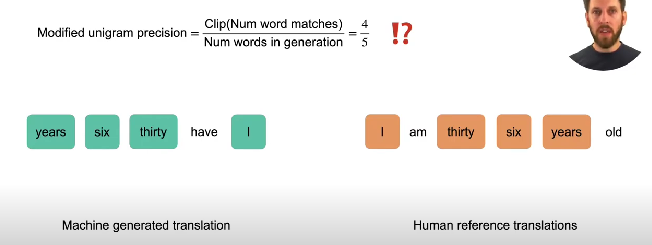

As we can see, BLEU-1 does not take word order into account when making the comparison (It mean, it does not compare words position to position), the which is a problem. In the last example is clear that the output of the model is not good and even so we get a good BLEU-1. Is for this that is best use BLEU-2, BLEU-3 and BLEU-4 because when comparing a sequence of 2, 3 and 4 words respectively, the order of the words would already be taken into account.

**Ex:** In the next example we use BLEU-4

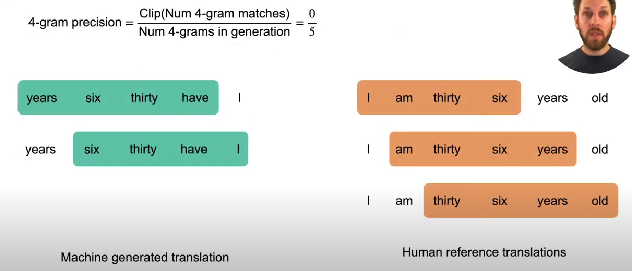


As we can see, to use BLEU-4, the low metric; So we are taking into account the order of the words. But in the last example there is a error because $\text{Num 4-gramas in generation}=2$


**Genereal BLEU Metric:** In general, the BLEU metric is the geometric mean of BLEU-1, BLEU-2, BLEU-3 and BLEU-4:

$$BLEU=\sqrt[4]{BLEU-1*BLEU-2*BLEU-3*BLEU-4}$$

In the paper, they only have results of BLEU-1, BLEU-2, BLEU-3 and BLEU-4.

But, the BLEU metric includes a brevity penalty to penalize cases in which the reference is longer than the model output:



$$
BP =
\begin{cases}
    1, & \text{if } c > r \\
    \exp(1-\frac{r}{c}), & \text{if } c \leq r
\end{cases}
$$

where **c** is the length of the candidate phrase (number of words) and **r** is the length of the reference phrase (number of words).

as we can see, when the model output is longer that the reference or iqual, the brevity penalty is 1.

Is clear that $BP \in [0,1]$ always; therefore always reduces the BLEU metric.


In these cases, the BLEU metric is:

$$BLEU=BP*\sqrt[4]{BLEU-1*BLEU-2*BLEU-3*BLEU-4}$$

As we can see, $BLEU, BLEU-1, BLEU-2, BLEU-3, BLEU-4 \in [0,1]$, then, the closer the metric is to 1, the better the model is. However, a BLEU value greater than 0.4 is often considered good, but this is highly data and task dependent; therefore it is always good to compare yourself with similar works (In our case with VisualMRC)


If we want to compute this metric for multiples instances, that would be the mean of the metric for all instances **(This too is for the next metrics)**



**Note:** As we can see, the BLEU metric does not take into account the semantic meaning of the texts, however, its "sacrebleu" extension does.






In [ ]:
! pip install datasets transformers[sentencepiece]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00


In [ ]:
! pip install nltk rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=846627f3f623851eb543d505dbfe7f4f14a31bd32d6f691e7e320300f9854606
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
from datasets import load_metric

bleu = load_metric("bleu") #Load The metric BLEU
predictions = [["I", "have", "thirty", "six", "years","old"]] #Prediction
references = [
    [["I", "am", "thirty", "six", "years", "old"]]
] #Reference
bleu.compute(predictions=predictions, references=references) #BLEU metric

#BLEU-1= 5/6=0.83333
#BLEU-2=3/5=0.6
#BLEU-3=2/4=0.5
#BLEU-4=1/3=0.3333
#BLEU=0.5372
#BP=1

{'bleu': 0.537284965911771,
 'precisions': [0.8333333333333334, 0.6, 0.5, 0.3333333333333333],
 'brevity_penalty': 1.0,
 'length_ratio': 1.0,
 'translation_length': 6,
 'reference_length': 6}

In [ ]:
#The last example but with BP!=1
from datasets import load_metric

bleu = load_metric("bleu") #Load The metric BLEU
predictions = [["I", "have", "thirty", "six", "years","old"]] #Prediction
references = [
    [["I", "am", "thirty", "six", "years", "old","now"]]
] #Reference
bleu.compute(predictions=predictions, references=references) #BLEU metric

#BLEU-1= 5/6=0.83333
#BLEU-2=3/5=0.6
#BLEU-3=2/4=0.5
#BLEU-4=1/3=0.3333
#BLEU=0.5372*BP
#BP=0.8571

{'bleu': 0.4548019047027907,
 'precisions': [0.8333333333333334, 0.6, 0.5, 0.3333333333333333],
 'brevity_penalty': 0.846481724890614,
 'length_ratio': 0.8571428571428571,
 'translation_length': 6,
 'reference_length': 7}

In [ ]:
#As we can see, the metrics BLEU-2, BLEU-3 and BLEU-4 is good use when we have long texts, in other wise, these metrics will tend.
#For example in this case BLEU-4=0 always.
from datasets import load_metric

bleu = load_metric("bleu") #Load The metric BLEU
predictions = [["I", "have", "thirty"]] #Prediction
references = [
    [["I", "am", "thirty", "six", "years", "old"]]
] #Reference
bleu.compute(predictions=predictions, references=references) #BLEU metric

{'bleu': 0.0,
 'precisions': [0.6666666666666666, 0.0, 0.0, 0.0],
 'brevity_penalty': 0.36787944117144233,
 'length_ratio': 0.5,
 'translation_length': 3,
 'reference_length': 6}

#**ROUGE-L (Recall-Oriented Understudy for Gisting Evaluation - Longest Common Subsequence):**

This metric was initially used for automatic summary models.

Calculates the similarity between the model-generated text and the original text, based on the longest sequence in common between them.

**ROUGE-L PRECISION:** Is the longest sequence in common between the model-generated text and the original text (Number of words) divided length of the model-generated text (Number of words):

$$\text{ROUGE-L Precision}=\frac{LCS(gen,ref)}{\text{Num words of model-generated text}} \in [0,1]$$

**ROUGE-L RECALL:** Is the longest sequence in common between the model-generated text and the original text (Number of words) divided length of the original text (Number of words):

$$\text{ROUGE-L Recall}=\frac{LCS(gen,ref)}{\text{Num words of original text}} \in [0,1]$$

As we can see, **ROUGE-L PRECISION** use the length of the model-generated text while **ROUGE-L RECALL** use the length of the original text, then if we want to use both, we can use the **ROUGE-L F1-SCORE:**

$$\text{ROUGE-L F1-SCORE}=2\frac{\text{ROUGE-L PRECISION}*\text{ROUGE-L RECALL}}{\text{ROUGE-L PRECISION}+\text{ROUGE-L RECALL}}$$

**Ex:**

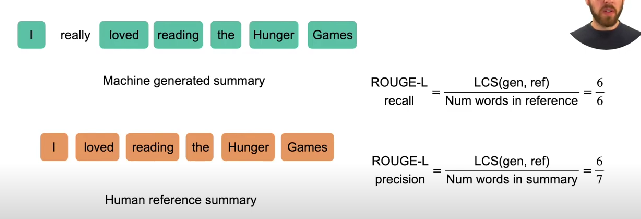


$$\text{ROUGE-L F1-SCORE}=2\frac{0.857*1}{0.857+1}=0.923$$

As we can see, for calculate the longest sequence in common between the model-generated text and the original text, it does not matter if in the sequence generated by the model there are more words involved (This helps the metric capture the semantic meaning between the texts).

As we can see, $ROUGE-L F1-SCORE, ROUGE-L PRECISION, ROUGE-L RECALL \in [0,1]$, then, the closer the metric is to 1, the better the model is. However, a ROUGE-L value greater than 0.3 is often considered good, but this is highly data and task dependent; therefore it is always good to compare yourself with similar works (In our case with VisualMRC).



In [ ]:
from datasets import load_metric

rouge = load_metric("rouge") #Load rouge metric
predictions = ["I really loved reading the Hunger Games"] #Prediction text
references = ["I loved reading the Hunger Games"] #Reference text
rouge.compute(predictions=predictions, references=references)["rougeL"] #Calculate ROUGE-L Metric.

AggregateScore(low=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), mid=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923), high=Score(precision=0.8571428571428571, recall=1.0, fmeasure=0.923076923076923))

#**METEOR (Metric for Evaluation of Translation with Explicit ORdering):**

This metric was initially used for automatic summary models.

Calculates a measure of similarity between the text generated by the model and the original text, based on the matching of words, phrases and their order. This metric takes into account precision, recall, the weighted F1 score (Giving more weight to the recall, to give more weight to the length of the original text) and a penalty factor for sequence order errors.

$$\text{METEOR PRECISION}=\frac{\text{number of unigrams in common in the original text and the text generated by the model}}{\text{Number of unigrams in the text generated by the model}} \in [0,1]$$

$$\text{METEOR PRECISION}=\frac{\text{number of unigrams in common in the original text and the text generated by the model}}{\text{Number of unigrams in the original text}} \in [0,1]$$

$$F_{mean}=\frac{10\text{METEOR PRECISION}*\text{METEOR RECALL}}{\text{METEOR RECALL}+9\text{METEOR PRECISION}} \in [0,1]$$

As we can see, give more weight to the recall (Denominator).

**When calculating the number of unigrams in common, METEOR takes into account not only exact words in common but also similar words in common**

**Ex:**

REFERENCE: The car is in the **parking**

HYPOTHESIS: The car is in the **garage**

Number of unigrams in common=6 (Because **parking** and **garage** are sinonymous)

**Then this metric considers the semantic similarity between the texts.**


**Chunk Penalty:** This penalty allows penalizing the metric when there are errors in the order of the sequence generated by the model.

$$CP=0.5(\frac{\text{Number of chunks in text generated for the model}}{\text{Number of unigrams in text generated for the model}})^{3} \in [0,0.5]$$

**Ex:**

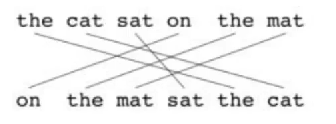

$$CP=0.5(\frac{3}{6})^{3}=0.0625$$

Where each chunk is a piece of words that are consecutive in the text generated by the model but that are also consecutive in the original text. For example if the text generated for the model is completely upside down, then the number of chunks is iqual to 6 and the $CP=0.5$ that is a majour penalty for the metric.

Then the METEOR metric is:

$$METEOR=(1-CP)*F_{mean} \in [0,1)$$

As we can see, $METEOR \in [0,1)$, then, the closer the metric is to 1, the better the model is. However, a METEOR value greater than 0.2 is often considered good, but this is highly data and task dependent; therefore it is always good to compare yourself with similar works (In our case with VisualMRC).




In [ ]:
import nltk
from nltk.translate.meteor_score import meteor_score
# Descargar el recurso wordnet y punkt (si no lo has descargado previamente)
nltk.download('wordnet')
nltk.download('punkt')

referencias = [['The quick brown fox jumps over the lazy dog. The quick brown fox jumps over the lazy dog.']]  # Original text
hipotesis = ['The fast brown fox jumps over the sleepy dog. The fast brown fox jumps over the sleepy dog.']       # Text generated for the model



# Calculate METEOR:
meteor_score_result = meteor_score(referencias, hipotesis)

print("METEOR score:", meteor_score_result) #METEOR metric


METEOR score: 0.0


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#**BERT Score:**

This metric was proposed initialy for evaluate text generation models.

The added value of this metric is that in addition to taking into account the syntactic similarity (Text Structure), it also takes into account the semantic similarity (Meaning of the texts).

Studies show that this metric has a 70% correlation with human judgment, while the previous metrics only have a 50% correlation with human judgment.

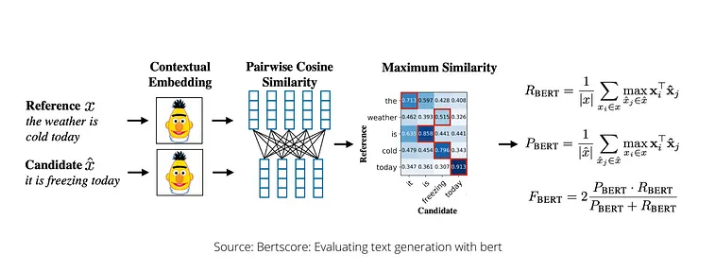

In [2]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00


In [4]:
from bert_score import score

referencia = 'the cat is green' #original text
hipotesis = 'the cat is black and fat'  #gererated text for by the model

P, R, F1 = score([hipotesis], [referencia], lang='en', rescale_with_baseline=True) #precision, recall and F1 Score

bertscore = F1.item()

print("BERTScore:", bertscore)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore: 0.6516950726509094
